In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE


In [ ]:
df = pd.read_csv('/content/diabetes_prediction_dataset.csv')
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [ ]:
# Step 3: Encode all object (text) columns to numeric
categorical_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])



In [ ]:
# Step 4: Correlation matrix banana
corr_matrix = df.corr()

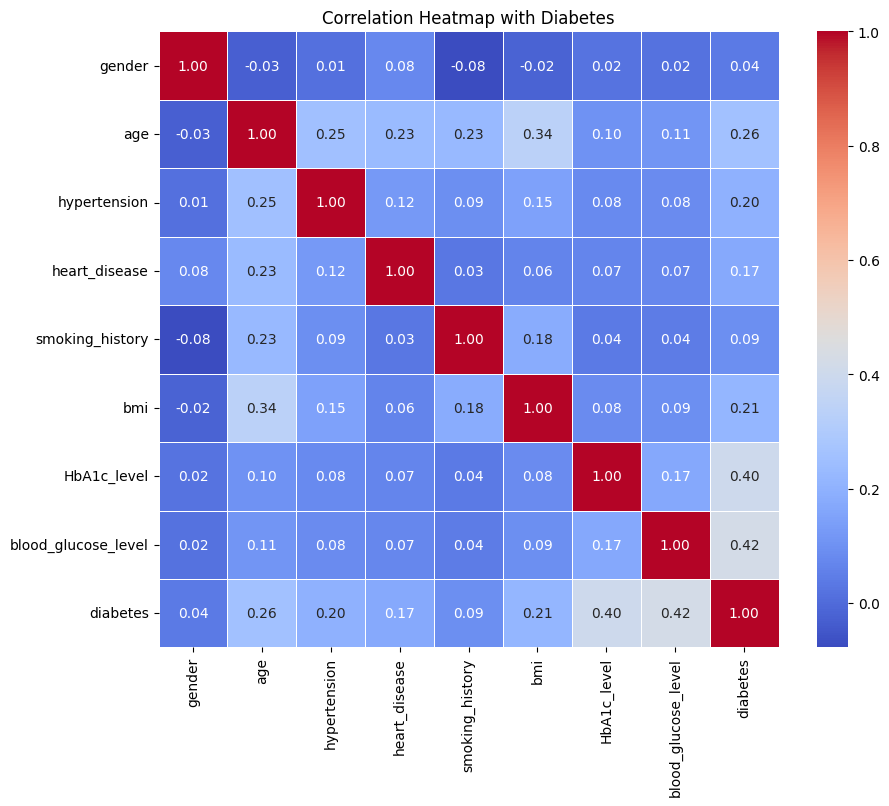

In [ ]:
# Step 5: Heatmap draw karna
plt.figure(figsize=(10, 8))  # Graph ka size set karte hain
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap with Diabetes")
plt.show()


In [ ]:
df1 = df[['age',  'heart_disease', 'bmi', 'diabetes']]

In [ ]:
# Step 2: Split into features and target
X = df1.drop('diabetes', axis=1)
y = df1['diabetes']

In [ ]:
# Step 3: Handle categorical columns (if any) and scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

In [ ]:
# Step 4: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
# Step 5: Train model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7440437158469946


In [ ]:
# Step 6: Take user input
print("🔹 Enter the following details for prediction:\n")
age_input = float(input("Age: "))
heart_disease_input = int(input("Heart Disease (1 for Yes, 0 for No): "))
bmi_input = float(input("BMI: "))

# Prepare user input for prediction
user_data = [[age_input, heart_disease_input, bmi_input]]
user_data_scaled = scaler.transform(user_data)

# Step 7: Make prediction
prediction = model.predict(user_data_scaled)[0]

# Step 8: Show result
if prediction == 1:
    print("\n🛑 Alert: This person is likely to have **Diabetes**.")
else:
    print("\n✅ Good News: This person is **not likely to have Diabetes**.")

🔹 Enter the following details for prediction:

Age: 21
Heart Disease (1 for Yes, 0 for No): 1
BMI: 15

✅ Good News: This person is **not likely to have Diabetes**.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive
